# Project : Flight Fare Prediction

### Problem Statement:
Project aimed at prediction of flight tickets price using the given data for flights over various months and across various cities in India. Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. You will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Your objective is to predict the flight prices using that data


In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

- Since data is in form of excel file we have to use pandas read_excel to load the data.
- After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.
- Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
- Describe data which can give statistical analysis

In [2]:
data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 50m      1
29h 40m      1
13h 35m      1
27h 30m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

- <span style="color: red;">**.dt.day method will extract only day of that date**</span>\
- <span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [9]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Analyzing the Journey Month and it's relation with the price of the ticket

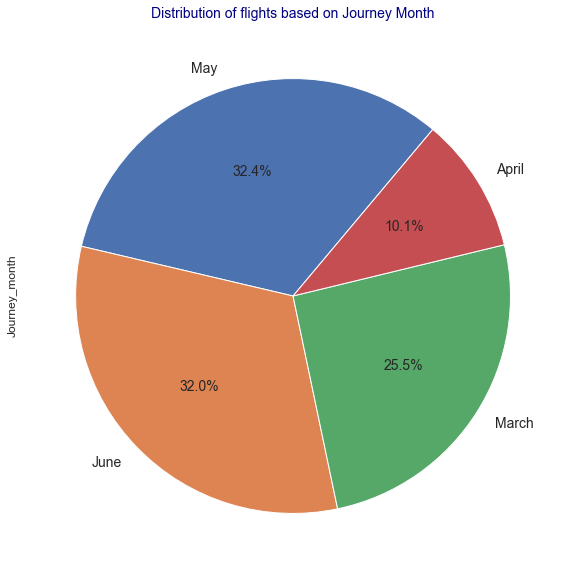

In [14]:
data.Journey_month.value_counts().plot.pie(startangle=50, 
                                           figsize=(10,10),
                                           autopct="%0.1f%%",
                                           labels = ['May', 'June', 'March', 'April'],
                                           textprops={'size':14})

plt.title('Distribution of flights based on Journey Month', size=14, color='navy' )
plt.show()

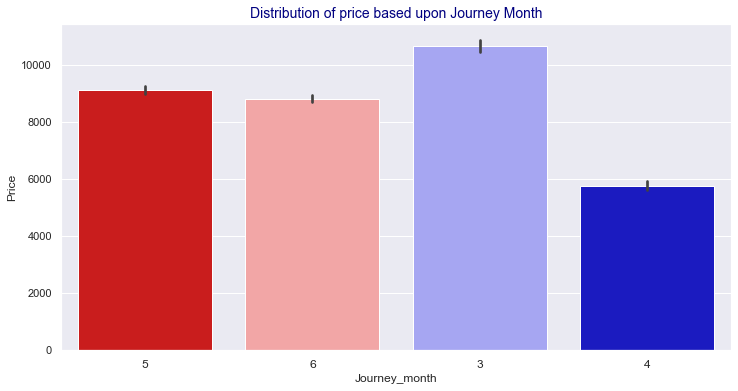

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=data.Journey_month, y=data.Price, palette='seismic_r', 
            order=data.Journey_month.value_counts().sort_values(ascending=False).index)
plt.xticks(size=12)
plt.title("Distribution of price based upon Journey Month", color='navy', size=14)
plt.show()

### Insights :

- The month of May is most popular and has highest number of flights, followed by June whereas the month of April has lowest distribution of flights.
- The price of flight tickets is highest during March, and lowest during April which means that airlines make a larger profit during March, and not during May which has highest number of numbers.

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data.Dep_Time).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data.Dep_Time).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Checking distribution of flight ticket price based upon flight departure hour.

Text(0.5, 1.0, 'Distribution of price based upon Departure hour')

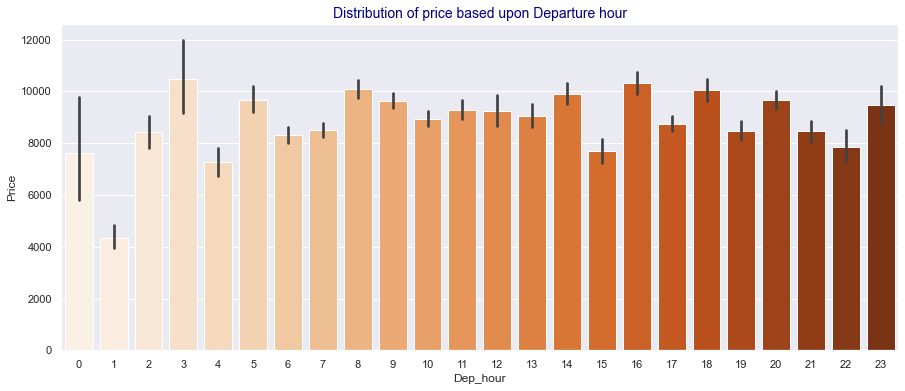

In [18]:
# for departure hour
plt.figure(figsize=(15,6))
sns.barplot(x='Dep_hour', y='Price', data=data, palette="Oranges")
plt.title("Distribution of price based upon Departure hour", color='navy', size=14)


### Insights :

- Price as per departure hour is almost evenly distributed with slightly higher range in the midnight to early morning hours from 00:00 hours to 03:00 hours

In [19]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Checking distribution of flight ticket price based upon flight Arrival hour.

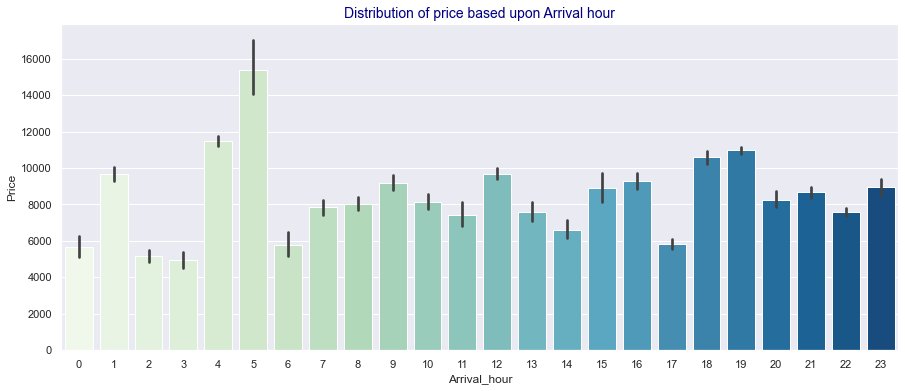

In [21]:
# for arrival hour
plt.figure(figsize=(15,6))
sns.barplot(x='Arrival_hour', y='Price', data=data, palette="GnBu")
plt.title("Distribution of price based upon Arrival hour", color='navy', size=14)

plt.show()

### Insights:

- Flights arriving at 5 o'clock in the morning have higher price than any other flight based on Arrival hour

In [22]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [24]:
data.drop(["Duration"], axis = 1, inplace = True)

In [25]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
# checking categories of Additional info feature
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Combining two categories of Additional_info feature

We will combine the "No Info" and "No info" categories.

In [27]:
data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("No Info", "No info"))

In [28]:
data.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### We can combine few more categories of this feature to reduce the categories having just 2 or 3 entries, into the No info category based on their price.

In [29]:
data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("1 Short layover", "Layover"))
data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("1 Long layover", "Layover"))
data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("2 Long layover", "Layover"))

data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("Red-eye flight", "No info"))
data.Additional_Info = data.Additional_Info.apply(lambda x : x.replace("Change airports", "No info"))

data.Additional_Info.value_counts()

No info                         8355
In-flight meal not included     1982
No check-in baggage included     320
Layover                           21
Business class                     4
Name: Additional_Info, dtype: int64

## Analysis of Additional_info feature

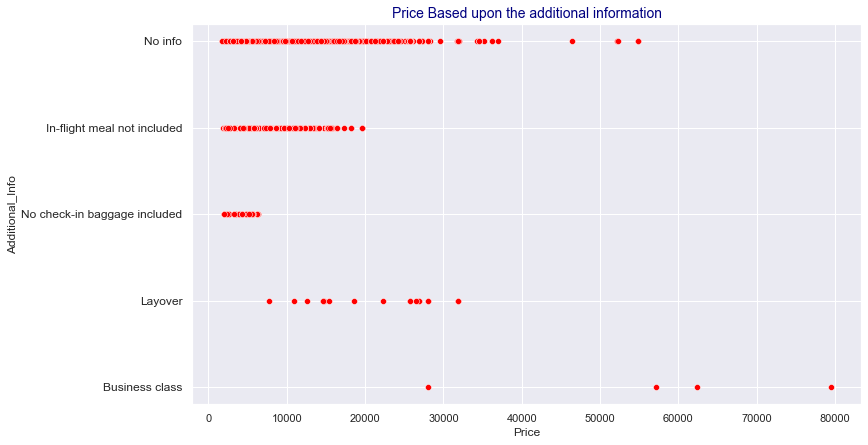

In [30]:
plt.figure(figsize=(12,7))
sns.scatterplot(y=data.Additional_Info, x=data.Price, color='red')
plt.yticks(size=12)
plt.title("Price Based upon the additional information", color='navy', size=14)
plt.show()

### Insights :

- Most of the flights have no additional information available.
- Flights which do not provide inflight meal is mostly priced below 20000
- Flights which do not include check-in baggage have ticket prices lower than 7000
- There are only 4 Business class flights and all of them are priced at more than 55000 and one at around 27000, thus acting as outliers here.

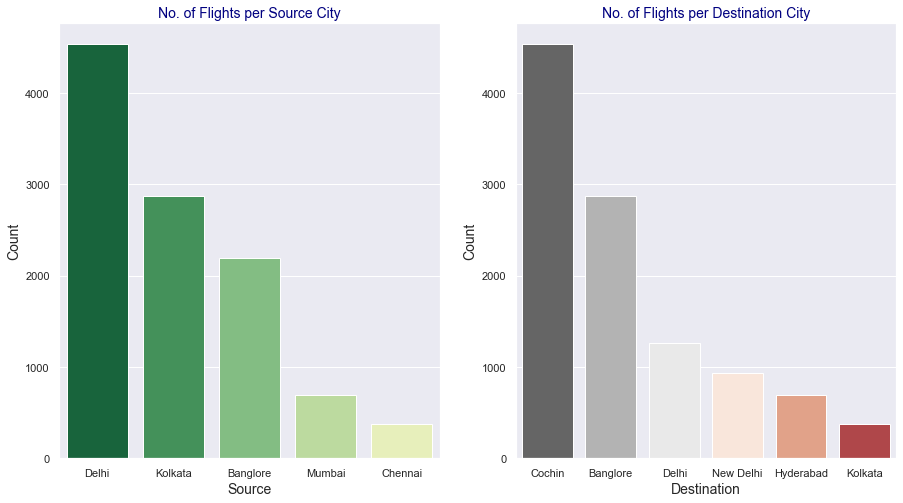

Most popular route for flights:
DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
Name: Route, dtype: int64


In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

sns.countplot(x=data.Source, order=data.Source.value_counts().sort_values(ascending=False).index, palette='YlGn_r'  ,ax=ax1)
ax1.set_xlabel("Source", size=14)
ax1.set_ylabel("Count", size=14)
ax1.set_title("No. of Flights per Source City", size=14, color='navy')

sns.countplot(x=data.Destination, order=data.Destination.value_counts().sort_values(ascending=False).index, palette='RdGy_r',ax=ax2)
ax2.set_xlabel("Destination", size=14)
ax2.set_ylabel("Count", size=14)
ax2.set_title("No. of Flights per Destination City", size=14, color='navy')

plt.show()

print("Most popular route for flights:")
print(data.Route.value_counts().sort_values(ascending=False).head())

### Insights :

- Maximum number of flights originate from Delhi, whereas Chennai is the source city for least flights (less than 300)
- The most popular destination city is Cochin amongst the 6 cities and Kolkata is the destination of less than 300 flights which is the least.
- There are many flights from Delhi to Cochin with one stop at Mumbai.

### Analyzing the price feature based upon the source and destination of flight.

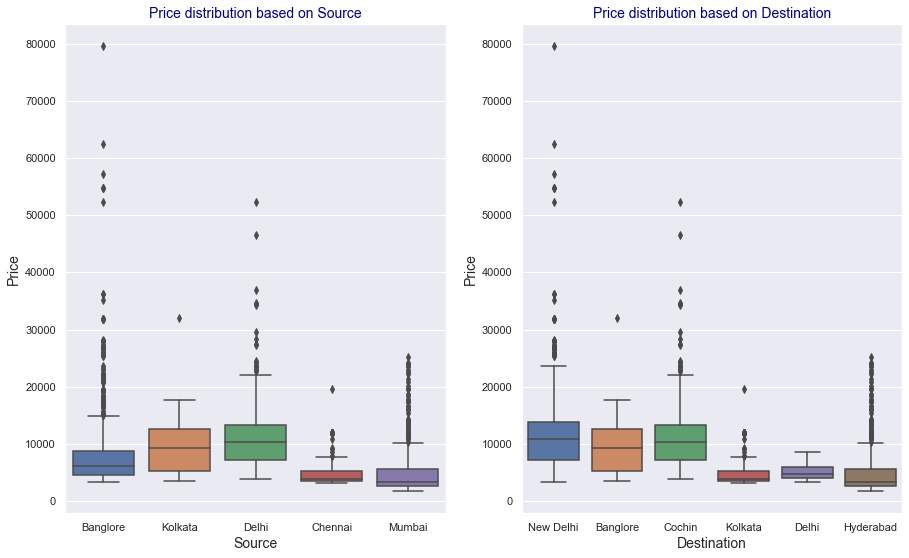

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,9))

sns.boxplot(x= data['Source'], y= data['Price'], ax=ax1)
ax1.set_xlabel("Source", size=14)
ax1.set_ylabel("Price", size=14)
ax1.set_title("Price distribution based on Source", size=14, color='navy')

sns.boxplot(x = data['Destination'], y = data['Price'], ax=ax2)
ax2.set_xlabel("Destination", size=14)
ax2.set_ylabel("Price", size=14)
ax2.set_title("Price distribution based on Destination", size=14, color='navy')

plt.show()

### Insights:

#### Source:

- The flights originating from **Delhi** have a higher price range as compared to other source cities.
- The price distribution of flights having source city **Bangalore** has the highest number of and also largest outliers indicating that some flights orginating from Bangalore have higher price than 75th percentile of flights from this city.
- Price of flights from source city **Kolkata** have the highest interquartile range, and also only one outlier.

#### Destination:

- Flights having **Cochin** and **New Delhi** has their destination have higher price range amongst others, with flights going to **New Delhi** being costlier amongst these two.
- Flights to **New Delhi** have the largest outliers in flight ticket price.
- Price of flights to **Delhi** has a clean distribution with no extreme values.
- The cost of flights **Kolkata** has smallest distribution with some outlying values, and **Hyderabad** has the least minimum flight cost amongst other destinations.
- The distributions of prices can also be affected by the number of flights.

### Distribution of price based on the total number of stops in the flight route.

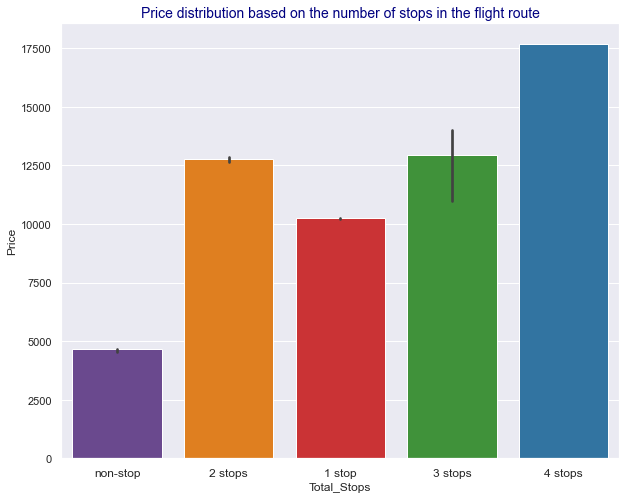

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x=data.Total_Stops, y=data.Price, estimator=np.median, palette='Paired_r')
plt.xticks(size=12)
plt.title("Price distribution based on the number of stops in the flight route", color="navy", size=14)
plt.show()

### Insights:

- The price of the flight clearly increases with an increase in the total number of stops in the flight journey.

### Checking the details of flights having the smallest and the largest price

In [34]:
# data of cheapest flights
data.sort_values(by="Price").head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,5,45,7,5,1,20
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10,1,25
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,22,45,0,10,1,25
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,3,4,22,45,0,15,1,30
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,27,3,2,55,4,25,1,30
5788,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,9,5,22,45,0,15,1,30
9514,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,1,6,22,45,0,15,1,30
8775,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,24,6,13,15,14,45,1,30
2102,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,27,6,13,15,14,45,1,30
9142,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,24,5,22,45,0,15,1,30


### Insights:

- The cheapest flight is priced at **1759** and is from **Mumbai to Hyderabad** with **0 stops**. Also this is of **SpiceJet** Ariline.
- The top 10 cheapest flights are from Mumbai to Hyderabad from Airline E, and all have duration 90 minutes and zero stops.

In [35]:
# data of costliest flights
data.sort_values(by="Price", ascending=False).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,45,12,25,6,40
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,14,25,4,40
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,40,0,45,6,5
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,1,3,16,55,23,0,6,5
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,22,50,5,5,6,15
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,52285,6,3,20,5,4,25,8,20
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,1,3,5,45,10,45,5,0
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,46490,3,3,20,5,4,25,8,20
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,36983,1,3,12,50,19,15,6,25


### Insights:

- Out of the top 10 cosliest flight tickets, **7** are from **Bangalore to New Delhi, with one stop**.
- The top **three most expensive** flight tickets are of **Business Class**.


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [36]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

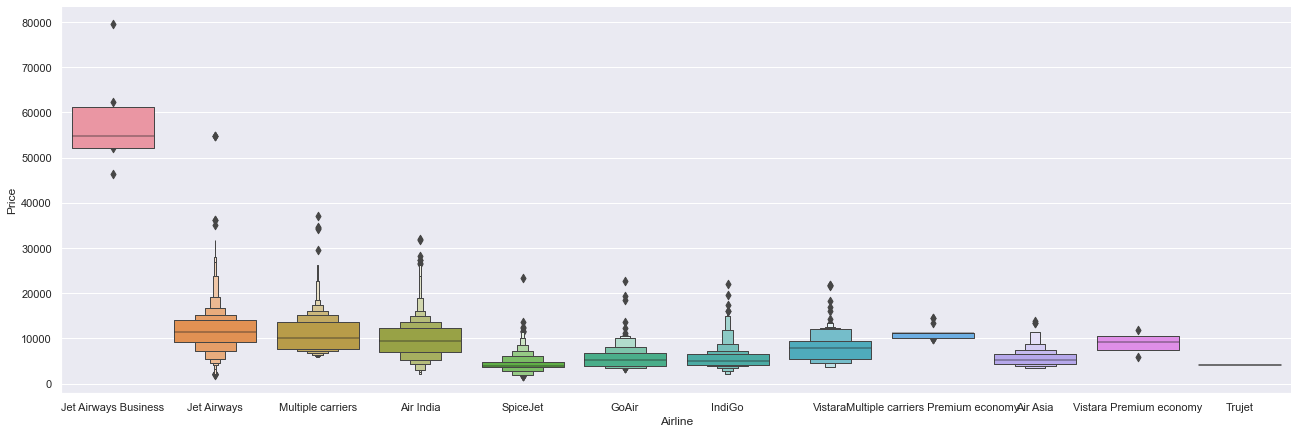

In [37]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

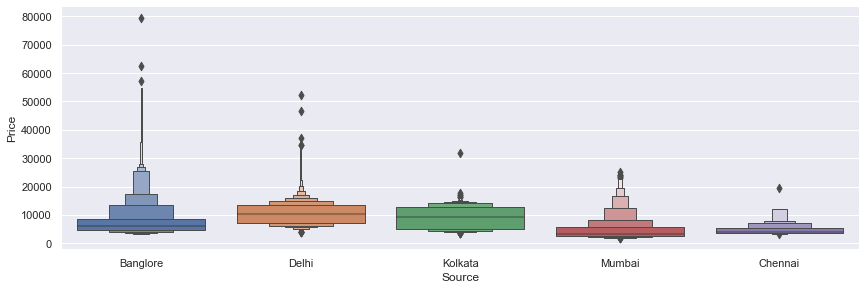

In [40]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [41]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [44]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [48]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [49]:
# Concatenate dataframe --> data + Airline + Source + Destination

data_train = pd.concat([data, Airline, Source, Destination], axis = 1)

In [50]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [52]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.shape

(10682, 30)

---

## Test dataset

In [54]:
test_data = pd.read_excel("Test_set.xlsx")

In [55]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [57]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [58]:
data_train.shape

(10682, 30)

In [59]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [60]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

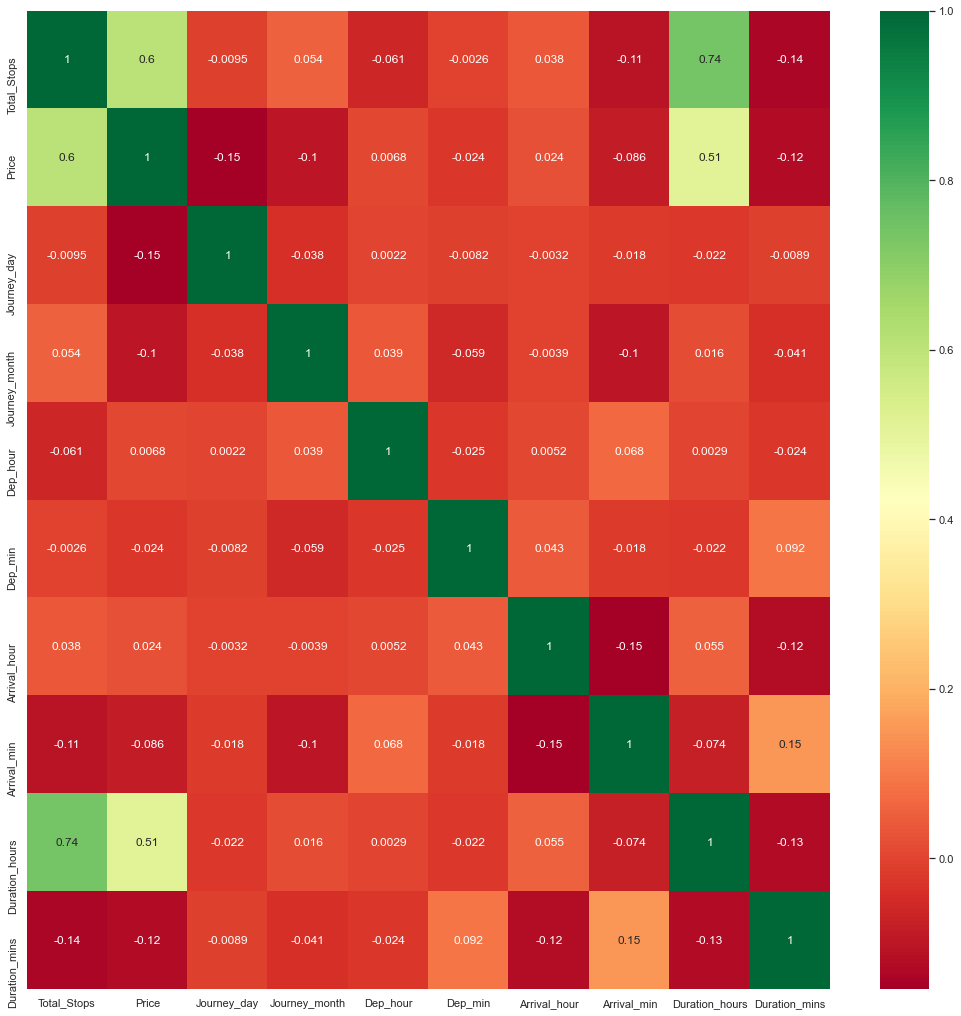

In [64]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [65]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [66]:
print(selection.feature_importances_)

[2.22696510e-01 1.43489746e-01 5.41363112e-02 2.43299449e-02
 2.16724058e-02 2.79753971e-02 1.86281257e-02 1.38814213e-01
 1.73804928e-02 8.94385374e-03 1.97463347e-03 1.52471032e-02
 1.37250771e-01 6.71376429e-02 1.92719755e-02 8.73912773e-04
 2.82074369e-03 1.02299636e-04 5.05947531e-03 8.35588170e-05
 4.89600083e-04 8.35883310e-03 3.30133270e-03 7.20648594e-03
 8.48083766e-03 1.34464887e-02 5.56658714e-03 3.87617661e-04
 2.48731010e-02]


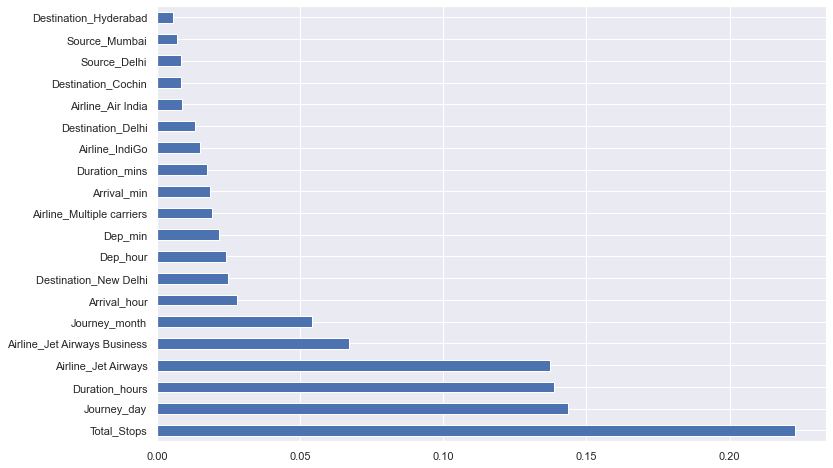

In [67]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(X_test)

In [71]:
reg_rf.score(X_train, y_train)

0.9536702356230728

In [72]:
reg_rf.score(X_test, y_test)

0.7958262489689705

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


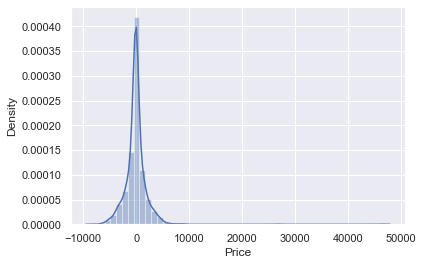

In [73]:
sns.distplot(y_test-y_pred)
plt.show()

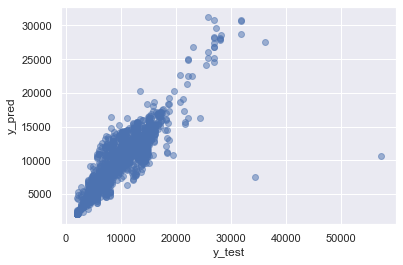

In [74]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
from sklearn import metrics

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1176.068384922518
MSE: 4402405.919646443
RMSE: 2098.1911065597533


In [77]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [78]:
metrics.r2_score(y_test, y_pred)

0.7958262489689705

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [85]:
prediction = rf_random.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


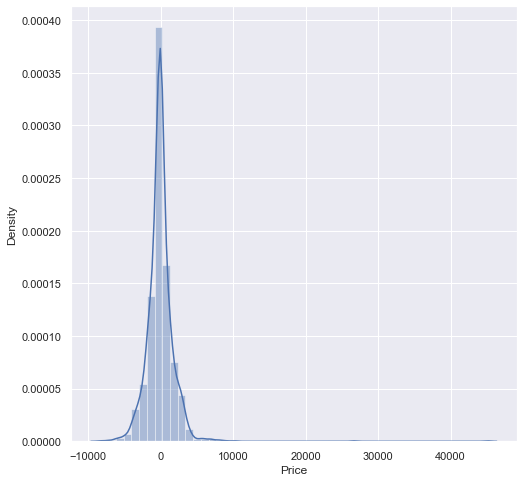

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

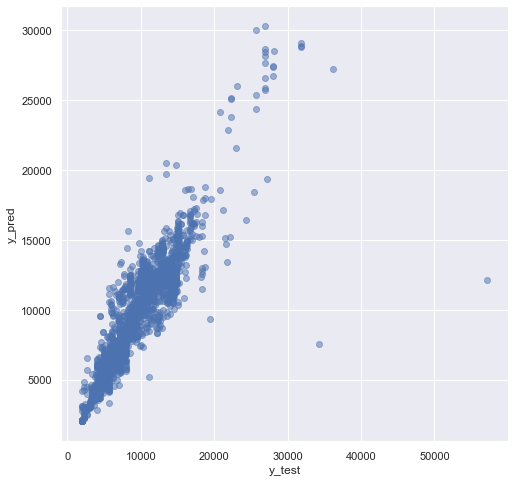

In [87]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.5362606707756
MSE: 4053586.542049704
RMSE: 2013.3520660951735


In [91]:
prediction_zeno = pd.DataFrame(y_pred, columns = ['Price'])

In [92]:
prediction_zeno.head(10)

,Price
0,16848.190000
1,5557.600000
2,8905.610000
3,3665.690000
4,15253.498833
5,9674.673310
6,12803.353333
7,5767.895167
8,14201.531310
9,13969.260000
